# Machine Learning - KNN = K-Nearest Neighbors Algorithem
# Prediction of The possibility of diabetes 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [5]:
data = pd.read_csv('E:\Momeni-Machne Learning class momeni 21 01 1402\Machine Learning\dataset/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
x = pd.DataFrame(data, columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values
y = data.Outcome.values.reshape(-1,1)
# .values : made the output a array, in some algorithm is better to use 
# array becasue array have higher speed, lower memory

In [7]:
x

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# We check different number for K to check its acuuracy

In [9]:
k=5
clf= KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [10]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7445887445887446


In [11]:
k=3
clf= KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [12]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.70995670995671


In [13]:
k=10
clf= KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [14]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7532467532467533


# Creat a 'For loop' to avoid these process

In [15]:
k= 20
Acc = np.zeros((k))

for i in range(1,k+1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    y_pred=clf.predict(x_test)
    Acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    
Acc

array([0.61038961, 0.71861472, 0.70995671, 0.74025974, 0.74458874,
       0.72727273, 0.75324675, 0.75324675, 0.75324675, 0.75324675,
       0.74891775, 0.74891775, 0.73593074, 0.73160173, 0.73593074,
       0.74025974, 0.74025974, 0.74025974, 0.73593074, 0.72727273])

In [16]:
print(np.max(Acc))
print(np.min(Acc))

0.7532467532467533
0.6103896103896104


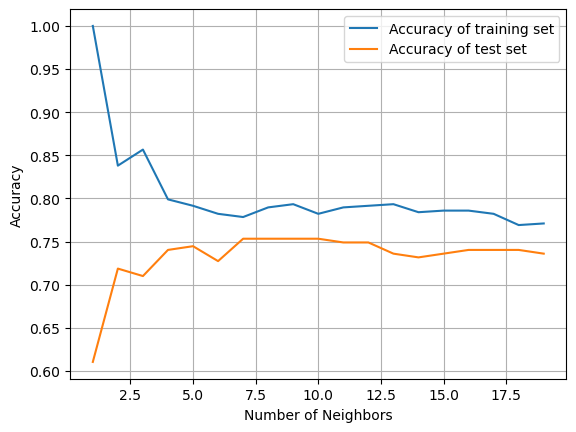

In [24]:
# Another way 

training_acc =[]
test_acc= []

# try KNN for different k nearest neighbor from 1 to 15

neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors =n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))
    
plt.plot(neighbors_setting,training_acc, label='Accuracy of training set')
plt.plot(neighbors_setting,test_acc, label='Accuracy of test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()


In [25]:
# at the above plot, it is clear that the best k is for 7
# becasue training and teating is close to each other at k=7

# Improve Model

In [26]:
# ensembel learning:
# We never know which model is better one=free launch 


In [20]:
# GridSearchCV is for KNN, 
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,50)}
grid_kn= GridSearchCV(estimator = knn,#model
                       param_grid = parameters,#range of k
                       scoring = 'accuracy',#strategy to evaluate the performance
                      # of the cross_validation model on the test set.
                       cv=5,# cross_validation generator
                       verbose=1,# time to calculate
                       n_jobs=-1)# help to CPU
 
grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [21]:
grid_kn.best_params_

{'n_neighbors': 7}

In [22]:
# k=7 is better 